In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

star_wars = pd.read_csv("star_wars.csv",encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [31]:
star_wars.columns
star_wars["Unnamed: 5"].head(30)

0     Star Wars: Episode III  Revenge of the Sith
1     Star Wars: Episode III  Revenge of the Sith
2                                             NaN
3     Star Wars: Episode III  Revenge of the Sith
4     Star Wars: Episode III  Revenge of the Sith
5     Star Wars: Episode III  Revenge of the Sith
6     Star Wars: Episode III  Revenge of the Sith
7     Star Wars: Episode III  Revenge of the Sith
8     Star Wars: Episode III  Revenge of the Sith
9     Star Wars: Episode III  Revenge of the Sith
10                                            NaN
11                                            NaN
12                                            NaN
13    Star Wars: Episode III  Revenge of the Sith
14    Star Wars: Episode III  Revenge of the Sith
15    Star Wars: Episode III  Revenge of the Sith
16    Star Wars: Episode III  Revenge of the Sith
17                                            NaN
18    Star Wars: Episode III  Revenge of the Sith
19    Star Wars: Episode III  Revenge of the Sith


In [32]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

In [33]:
dic = {"Yes":True,"No":False}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(dic)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(dic)

In [34]:
dic1 = {"Star Wars: Episode I  The Phantom Menace":True,np.NaN:False}
dic2 = {"Star Wars: Episode II  Attack of the Clones":True,np.NaN:False}
dic3 = {"Star Wars: Episode III  Revenge of the Sith":True,np.NaN:False}
dic4 = {"Star Wars: Episode IV  A New Hope":True,np.NaN:False}
dic5 = {"Star Wars: Episode V The Empire Strikes Back":True,np.NaN:False}
dic6 = {"Star Wars: Episode VI Return of the Jedi":True,np.NaN:False}

In [35]:
star_wars["Which of the following Star Wars films have you seen? Please select all that apply."] = star_wars["Which of the following Star Wars films have you seen? Please select all that apply."].map(dic1)
star_wars["Unnamed: 4"] = star_wars["Unnamed: 4"].map(dic2)
star_wars["Unnamed: 5"] = star_wars["Unnamed: 5"].map(dic3)
star_wars["Unnamed: 6"] = star_wars["Unnamed: 6"].map(dic4)
star_wars["Unnamed: 7"] = star_wars["Unnamed: 7"].map(dic5)
star_wars["Unnamed: 8"] = star_wars["Unnamed: 8"].map(dic6)
star_wars["Unnamed: 5"].head(30)

1      True
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11    False
12    False
13     True
14     True
15     True
16     True
17    False
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26    False
27     True
28     True
29     True
30     True
Name: Unnamed: 5, dtype: bool

In [36]:
dict_rename = {}

for i,column in enumerate(star_wars.columns[3:9]):
    dict_rename[column] = "seen_{0}".format(i+1)
    
print(dict_rename)

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1', 'Unnamed: 4': 'seen_2', 'Unnamed: 5': 'seen_3', 'Unnamed: 6': 'seen_4', 'Unnamed: 7': 'seen_5', 'Unnamed: 8': 'seen_6'}


In [37]:
star_wars = star_wars.rename(columns = dict_rename)
star_wars[star_wars.columns[3:9]].head(30)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


In [38]:
star_wars[star_wars.columns[9:15]].astype(float)

dict_rename2 = {}

for i,column in enumerate(star_wars.columns[9:15]):
    dict_rename2[column] = "ranking_{0}".format(i+1)
    
star_wars = star_wars.rename(columns=dict_rename2)
star_wars[star_wars.columns[9:15]].head(30)

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3
6,1,4,3,6,5,2
7,6,5,4,3,1,2
8,4,5,6,3,2,1
9,5,4,6,2,1,3
10,1,2,3,4,5,6


ranking_1    3.736211
ranking_2    4.091127
ranking_3    4.344125
ranking_4    3.269784
ranking_5    2.511990
ranking_6    3.046763
dtype: float64
ranking_1    3.736211
ranking_2    4.091127
ranking_3    4.344125
ranking_4    3.269784
ranking_5    2.511990
ranking_6    3.046763
dtype: float64


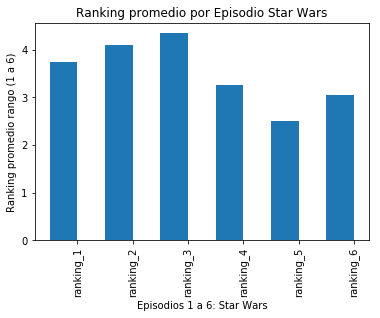

In [39]:
dictionary = {np.NaN:0}
rankings = star_wars[star_wars.columns[9:15]]
rank = rankings.loc[:,["ranking_1","ranking_2","ranking_3","ranking_4","ranking_5","ranking_6"]].astype(float)
rank1 = rank.dropna()
ranking_final = rank1.mean()

print(ranking_final)
print(ranking_final)

%matplotlib inline

cols = ["ranking_1","ranking_2","ranking_3","ranking_4","ranking_5","ranking_6"]
fig, ax = plt.subplots()
bar_heights = ranking_final
bar_positions = [0.75,1.75,2.75,3.75,4.75,5.75]
tick_positions = range(1,7)

ax.bar(bar_positions,bar_heights,0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(cols,rotation=90)
ax.set_ylabel('Ranking promedio rango (1 a 6)')
ax.set_xlabel('Episodios 1 a 6: Star Wars')
ax.set_title("Ranking promedio por Episodio Star Wars")
plt.show()

###### Summary:

<i>
So far what was done was:
- Read the csv file with "ISO-8859-1" coding.

- Remove the nulls from the ID column of the respondent (those who did not respond had null values).

- replace several answer columns "Yes" - "No" to Boolean values ​​True-False and thus facilitate the selection in the column "... Truly the movie ..." and in the "... do you consider yourself fan of the saga?

- replace the columns where they asked and saw each of the films in the saga whose answer was the name of the film itself, directly by Truth or if the answer was null or np.NaN by False.

- They became the names of the columns to the shorter names (see above) with the pandas.map (dic) method.

- The means of the scores awarded to each film will be calculated.


Graphs 5 and 6 seem to have values closer to 1.


In [41]:
seen_movies_count = star_wars[["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]].sum()

star_wars[["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]].head(30)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


In [42]:
print(seen_movies_count)
print(ranking_final)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64
ranking_1    3.736211
ranking_2    4.091127
ranking_3    4.344125
ranking_4    3.269784
ranking_5    2.511990
ranking_6    3.046763
dtype: float64


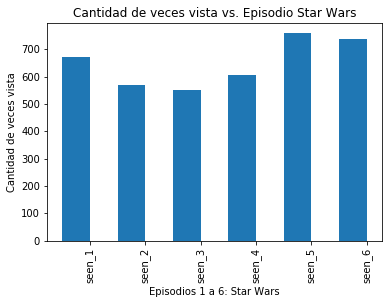

In [43]:
cols2 = ["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]
fig, ax1 = plt.subplots()
bar_heights = seen_movies_count
bar_positions = [0.75,1.75,2.75,3.75,4.75,5.75]
tick_positions = range(1,7)

ax1.bar(bar_positions,bar_heights,0.5)
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(cols2,rotation=90)
ax1.set_ylabel('Cantidad de veces vista')
ax1.set_xlabel('Episodios 1 a 6: Star Wars')
ax1.set_title("Cantidad de veces vista vs. Episodio Star Wars")
plt.show()

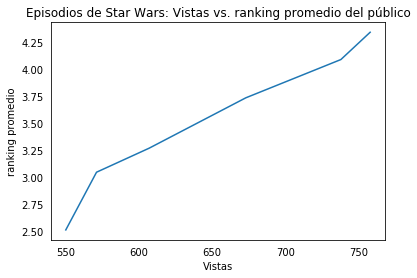

In [44]:
plt.plot(seen_movies_count.sort_values(),ranking_final.sort_values())

for key,spine in ax.spines.items():
        spine.set_visible(False)
    
plt.title("Episodios de Star Wars: Vistas vs. ranking promedio del público")
plt.tick_params(bottom="off", top="off", left="off", right="off",labelbottom="on")
#plt.xticklabels(cols2,rotation=90)
plt.ylabel('ranking promedio')
plt.xlabel('Vistas')

plt.show()

#### Graphics and analysis:

<i> We can see that there is a totally positive correlation in
the average ranking received by the public and the number of times the movie was viewed.

In [47]:
males = star_wars[star_wars["Gender"]=="Male"]
females = star_wars[star_wars["Gender"]=="Female"]
males.head(21)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


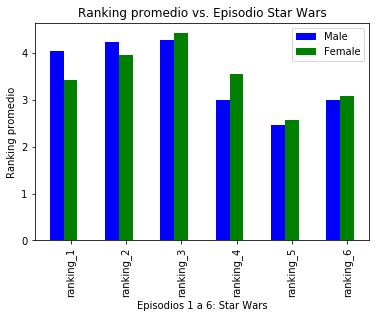

In [48]:
cols2 = ["ranking_1","ranking_2","ranking_3","ranking_4","ranking_5","ranking_6"]
fig, ax3 = plt.subplots()
bar_heights1 = males[males.columns[9:15]].astype(float).mean()
bar_heights2 = females[females.columns[9:15]].astype(float).mean()
bar_positions1 = [0.75,1.75,2.75,3.75,4.75,5.75]
bar_positions2 = [1,2,3,4,5,6]

tick_positions = range(1,7)

p1 = ax3.bar(bar_positions1,bar_heights1,0.25,label="Male",color='b')
p2 = ax3.bar(bar_positions2,bar_heights2,0.25,label="Female",color='g')
ax3.set_xticks(tick_positions)
ax3.set_xticklabels(cols2,rotation=90)
ax3.set_ylabel('Ranking promedio')
ax3.set_xlabel('Episodios 1 a 6: Star Wars')
ax3.set_title("Ranking promedio vs. Episodio Star Wars")
ax3.legend()
plt.show()

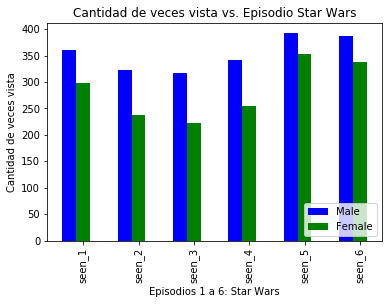

In [49]:
cols2 = ["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]
fig, ax4 = plt.subplots()
bar_heights3 = males[males.columns[3:9]].astype(float).sum()
bar_heights4 = females[females.columns[3:9]].astype(float).sum()
bar_positions3 = [0.75,1.75,2.75,3.75,4.75,5.75]
bar_positions4 = [1,2,3,4,5,6]

tick_positions = range(1,7)

p1 = ax4.bar(bar_positions3,bar_heights3,0.25,label="Male",color='b')
p2 = ax4.bar(bar_positions4,bar_heights4,0.25,label="Female",color='g')
ax4.set_xticks(tick_positions)
ax4.set_xticklabels(cols2,rotation=90)
ax4.set_ylabel('Cantidad de veces vista')
ax4.set_xlabel('Episodios 1 a 6: Star Wars')
ax4.set_title("Cantidad de veces vista vs. Episodio Star Wars")
ax4.legend(loc='lower right')
plt.show()

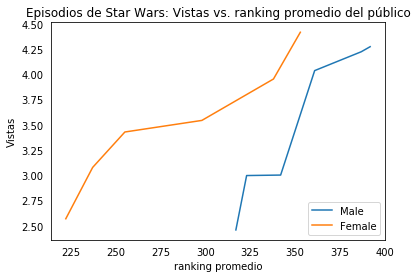

In [50]:
male_counts = males[males.columns[3:9]].astype(float).sum()
male_ranking = males[males.columns[9:15]].astype(float).mean()
female_counts = females[females.columns[3:9]].astype(float).sum()
female_ranking = females[females.columns[9:15]].astype(float).mean()

p1 = plt.plot(male_counts.sort_values(),male_ranking.sort_values(),label='Male')
p2 = plt.plot(female_counts.sort_values(),female_ranking.sort_values(),label='Female')

for key,spine in ax.spines.items():
        spine.set_visible(False)
    
plt.title("Episodios de Star Wars: Vistas vs. ranking promedio del público")
plt.tick_params(bottom="off", top="off", left="off", right="off",labelbottom="on")
plt.ylabel('Vistas')
plt.xlabel('ranking promedio')
plt.legend(loc='lower right')
plt.show()

##### The previously detected trend is repeated for men and women separately, however, it changes the range of visualizations of each film, but not the score range that remains similar in both genders.
##### The range of visualizations is more limited in men starting from a larger number. It could be deduced that the fanaticism of men by the saga is superior.

In [57]:
star_wars["total_views"] = star_wars[["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]].sum(axis=1)
ed_count = star_wars[["Education","total_views"]]

In [59]:
print(ed_count.shape)
print(ed_count["Education"].unique())
ed_count_clean = ed_count[ed_count["Education"].notnull()]
print(ed_count_clean.shape)
ed_count_clean.head(30)

(1186, 2)
['High school degree' 'Bachelor degree' 'Some college or Associate degree'
 nan 'Graduate degree' 'Less than high school degree']
(1036, 2)


,Education,total_views
1,High school degree,6
2,Bachelor degree,0
3,High school degree,3
4,Some college or Associate degree,6
5,Some college or Associate degree,6
6,Bachelor degree,6
7,High school degree,6
8,High school degree,6
9,Some college or Associate degree,6
10,Some college or Associate degree,1


[[1211]
 [1038]
 [ 327]
 [  18]
 [1210]]


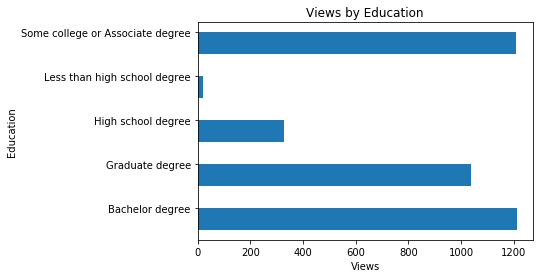

In [81]:
ed_list = ed_count_clean.groupby(by="Education")
a = ed_list.agg(np.sum)
print(a.values)
cols_ed = ['Bachelor degree','Graduate degree','High school degree','Less than high school degree','Some college or Associate degree']
fig, ax = plt.subplots()
bar_with = [1211,1038,327,18,1210]
bar_positions = [0.75,1.75,2.75,3.75,4.75]
tick_positions = range(1,6)

ax.barh(bar_positions,bar_with,0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(cols_ed)
ax.set_ylabel('Education')
ax.set_xlabel('Views')
ax.set_title("Views by Education")
plt.show()

##### We can see that the episodes of Star Wars are more viewed as there is a higher academic level, this may be due to a question of age. People with "less than high school degree" saw very little of the saga.

                          total_views
Location (Census Region)             
East North Central                624
East South Central                153
Middle Atlantic                   462
Mountain                          324
New England                       294
Pacific                           663
South Atlantic                    603
West North Central                340
West South Central                358


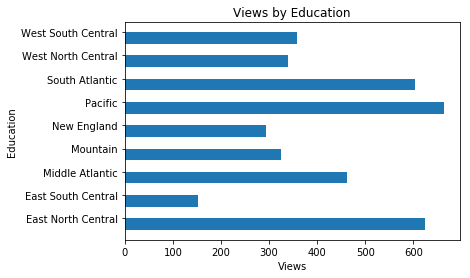

In [88]:
Location_count = star_wars[["Location (Census Region)","total_views"]]
location_list = Location_count.groupby(by="Location (Census Region)")
b = location_list.agg(np.sum)
print(b)

cols_ed = b.index
fig, ax = plt.subplots()
bar_with = [624,153,462,324,294,663,603,340,358]
bar_positions = [0.75,1.75,2.75,3.75,4.75,5.75,6.75,7.75,8.75]
tick_positions = range(1,10)

ax.barh(bar_positions,bar_with,0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(cols_ed)
ax.set_ylabel('Education')
ax.set_xlabel('Views')
ax.set_title("Views by Education")
plt.show()


##### We see that the Mountain, East South Central and New England states are the least fans of the saga.

In [84]:
z = star_wars["Which character shot first?"].value_counts().sum()
print(star_wars["Which character shot first?"].value_counts()/z*100)

Han                                 39.251208
I don't understand this question    36.956522
Greedo                              23.792271
Name: Which character shot first?, dtype: float64


##### We can see that of the total number of people who answered the question 40% answered that it was Han Solo who shot first in the saga, 24% who was Greedo and the remaining 37% did not understand the question.

<i> To be able to infer what is the correct answer without searching Google, we could filter the "authorized interviewees" as those who saw the whole saga, it will surely be a way to glimpse the correct answer.

In [85]:
w = star_wars.loc[star_wars["total_views"] == 6]["Which character shot first?"].value_counts().sum()
print(star_wars["Which character shot first?"].value_counts()/w*100)

Han                                 70.043103
I don't understand this question    65.948276
Greedo                              42.456897
Name: Which character shot first?, dtype: float64


###### We finally have a 70% tendency towards the "Han Solo" response. Under the assumptions we could infer that it is the correct answer, although nothing can confirm, there could be a bias because the actor who plays "Han" is Harrison Ford, that is, someone very famous. On the other hand, assuming that the inference is correct (which it is, because if we search in Google we realize), we do not have a percentage closer to 100% since the saga is very famous, most people saw it , that is, the "Having seen the 6" is not a defining sign that you are a fanatic, although it limits the result and improves the estimate.

In [86]:
caracters_rankings = {}
star_wars
print(star_wars["Unnamed: 19"].value_counts())
for i in range(16,29):
    a = star_wars.iloc[:,i].value_counts()["Very favorably"]
    b = star_wars.iloc[:,i].value_counts()["Somewhat favorably"]
    c = star_wars.iloc[:,i].value_counts()["Somewhat unfavorably"]
    d = star_wars.iloc[:,i].value_counts()["Very unfavorably"]
    caracters_rankings[i] = a+b-c-d
    
list(caracters_rankings.values())



Very favorably                                 591
Somewhat favorably                             159
Neither favorably nor unfavorably (neutral)     43
Unfamiliar (N/A)                                17
Somewhat unfavorably                             8
Very unfavorably                                 7
Name: Unnamed: 19, dtype: int64


[755, 739, 392, 735, 61, 230, 294, 150, 673, 731, -64, 259, 733]

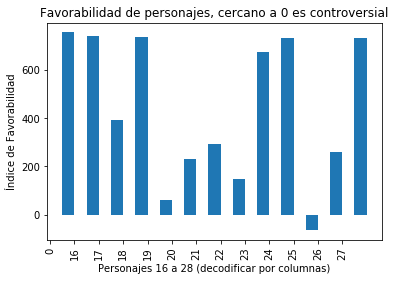

In [87]:
colsq = [0]+list(caracters_rankings.keys())
fig, ax21 = plt.subplots()
bar_heights = list(caracters_rankings.values())
bar_positions = []
for i in range(13):
    bar_positions.append(0.75+i)
tick_positions = range(13)

ax21.bar(bar_positions,bar_heights,0.5)
ax21.set_xticks(tick_positions)
ax21.set_xticklabels(colsq,rotation=90)
ax21.set_ylabel('Índice de Favorabilidad')
ax21.set_xlabel('Personajes 16 a 28 (decodificar por columnas)')
ax21.set_title("Favorabilidad de personajes, cercano a 0 es controversial")
plt.show()

##### According to the graph, the most favorable character is that of column 16 (most positive value), the least favorable is that of column 26 (most negative value) and the most controversial is column 20 (most value) close to 0).